In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np 

In [3]:
%matplotlib notebook

In [4]:
from scipy.stats import logistic

In [5]:
import h5py

In [6]:
import os

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
cwd = os.getcwd() 
path = os.path.join(cwd,'data') 

In [9]:
def load_dataset():
    fn = os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) 
    y_train = np.array(train_dataset["train_set_y"][:]) 
    fn = os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) 
    y_test = np.array(test_dataset["test_set_y"][:]) 
    classes = np.array(test_dataset["list_classes"][:])
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    return X_train, y_train, X_test, y_test, classes

In [10]:
# завантаження датасету
X_train, y_train, X_test, y_test, classes = load_dataset()

# розділення на y_train і y_test
y_train = y_train.ravel()
y_test = y_test.ravel()

# розділення даних на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

print ('X_train.shape =', X_train.shape)
print ('X_test.shape =', X_test.shape)
print ('y_train.shape =', y_train.shape)
print ('y_test.shape =', y_test.shape)

X_train.shape = (864, 64, 64, 3)
X_test.shape = (216, 64, 64, 3)
y_train.shape = (864,)
y_test.shape = (216,)


In [11]:
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None: 
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows * n_cols)
    for i in range(n_rows): 
        for j in range(n_cols):
            index = n_rows * i + j           
            ax = plt.subplot(n_rows, n_cols, index + 1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

<IPython.core.display.Javascript object>


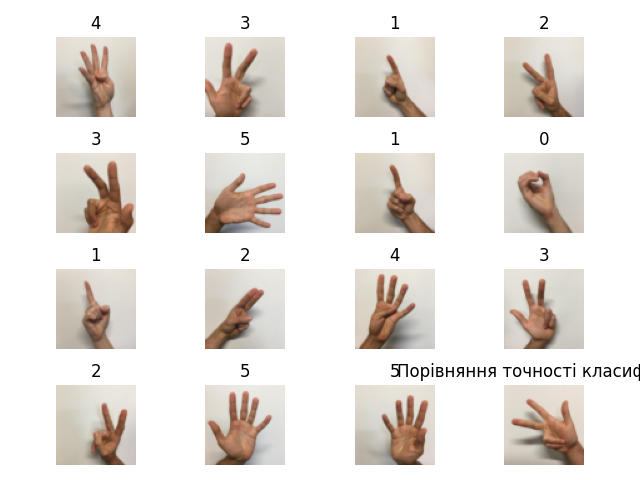

In [12]:
plt.figure()
display_samples_in_grid(X_train, n_rows=4, y=y_train)

In [13]:
plt.title('Train set')

Text(0.5, 1.0, 'Train set')

In [14]:
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 49.074%


In [15]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
# Створюємо EarlyStopping callback
earlystop = EarlyStopping(monitor='val_accuracy', patience=300)

# Створюємо ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Створюємо модель
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.Dense(100, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Компілюємо модель
model_1.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Навчаємо модель з використанням EarlyStopping та ModelCheckpoint callbacks
history_1 = model_1.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=300,
                        verbose=1,
                        callbacks=[earlystop, checkpoint],
                        shuffle=True)
test_loss, test_acc1 = model_1.evaluate(X_test, y_test)


Epoch 1/300
27/27 [==============================] - 1s 35ms/step - loss: 1642975.8750 - accuracy: 0.1481 - val_loss: 1368350.3750 - val_accuracy: 0.1574
Epoch 2/300
27/27 [==============================] - 1s 20ms/step - loss: 1583685.5000 - accuracy: 0.1933 - val_loss: 1260329.6250 - val_accuracy: 0.2037
Epoch 3/300
27/27 [==============================] - 1s 21ms/step - loss: 1426259.1250 - accuracy: 0.2095 - val_loss: 1080267.5000 - val_accuracy: 0.1713
Epoch 4/300
27/27 [==============================] - 1s 21ms/step - loss: 1428271.5000 - accuracy: 0.1968 - val_loss: 1000084.0000 - val_accuracy: 0.2361
Epoch 5/300
27/27 [==============================] - 1s 21ms/step - loss: 1391111.3750 - accuracy: 0.1944 - val_loss: 1350772.7500 - val_accuracy: 0.1944
Epoch 6/300
27/27 [==============================] - 1s 20ms/step - loss: 1245030.2500 - accuracy: 0.2234 - val_loss: 1601201.7500 - val_accuracy: 0.1759
Epoch 7/300
27/27 [==============================] - 0s 18ms/step - loss: 11

27/27 [==============================] - 1s 21ms/step - loss: 276050.5625 - accuracy: 0.5961 - val_loss: 268068.1562 - val_accuracy: 0.4769
Epoch 55/300
27/27 [==============================] - 1s 21ms/step - loss: 337971.2500 - accuracy: 0.5382 - val_loss: 139705.4219 - val_accuracy: 0.6481
Epoch 56/300
27/27 [==============================] - 1s 20ms/step - loss: 243999.9844 - accuracy: 0.5914 - val_loss: 129181.4297 - val_accuracy: 0.6481
Epoch 57/300
27/27 [==============================] - 1s 19ms/step - loss: 298822.8750 - accuracy: 0.5567 - val_loss: 330576.0312 - val_accuracy: 0.4954
Epoch 58/300
27/27 [==============================] - 0s 19ms/step - loss: 249558.2344 - accuracy: 0.5775 - val_loss: 566740.6875 - val_accuracy: 0.3565
Epoch 59/300
27/27 [==============================] - 1s 19ms/step - loss: 339917.2188 - accuracy: 0.5347 - val_loss: 358454.4688 - val_accuracy: 0.3704
Epoch 60/300
27/27 [==============================] - 1s 20ms/step - loss: 390420.5938 - accura

27/27 [==============================] - 0s 18ms/step - loss: 191641.1719 - accuracy: 0.6377 - val_loss: 208594.2188 - val_accuracy: 0.5741
Epoch 108/300
27/27 [==============================] - 0s 18ms/step - loss: 201090.3594 - accuracy: 0.6551 - val_loss: 677780.3125 - val_accuracy: 0.3750
Epoch 109/300
27/27 [==============================] - 0s 17ms/step - loss: 280104.0000 - accuracy: 0.5856 - val_loss: 182159.9688 - val_accuracy: 0.5787
Epoch 110/300
27/27 [==============================] - 0s 17ms/step - loss: 204541.2188 - accuracy: 0.6481 - val_loss: 425473.3438 - val_accuracy: 0.6343
Epoch 111/300
27/27 [==============================] - 0s 17ms/step - loss: 339995.0000 - accuracy: 0.5590 - val_loss: 122489.8516 - val_accuracy: 0.6667
Epoch 112/300
27/27 [==============================] - 1s 19ms/step - loss: 175091.2188 - accuracy: 0.6574 - val_loss: 105962.0859 - val_accuracy: 0.7315
Epoch 113/300
27/27 [==============================] - 0s 18ms/step - loss: 173178.9688 - 

27/27 [==============================] - 0s 17ms/step - loss: 208369.9375 - accuracy: 0.6551 - val_loss: 364409.8125 - val_accuracy: 0.4907
Epoch 161/300
27/27 [==============================] - 0s 17ms/step - loss: 310912.4062 - accuracy: 0.5845 - val_loss: 348795.7500 - val_accuracy: 0.6481
Epoch 162/300
27/27 [==============================] - 0s 17ms/step - loss: 300901.7188 - accuracy: 0.5856 - val_loss: 177893.5625 - val_accuracy: 0.6435
Epoch 163/300
27/27 [==============================] - 0s 17ms/step - loss: 213038.3281 - accuracy: 0.6701 - val_loss: 350332.7500 - val_accuracy: 0.4907
Epoch 164/300
27/27 [==============================] - 0s 17ms/step - loss: 203832.1406 - accuracy: 0.6458 - val_loss: 163258.1094 - val_accuracy: 0.6620
Epoch 165/300
27/27 [==============================] - 0s 17ms/step - loss: 223713.2344 - accuracy: 0.6435 - val_loss: 174149.5938 - val_accuracy: 0.6204
Epoch 166/300
27/27 [==============================] - 0s 17ms/step - loss: 126310.3125 - 

27/27 [==============================] - 0s 17ms/step - loss: 158087.2969 - accuracy: 0.7454 - val_loss: 243066.0938 - val_accuracy: 0.6620
Epoch 214/300
27/27 [==============================] - 0s 17ms/step - loss: 184946.5000 - accuracy: 0.7095 - val_loss: 165125.4375 - val_accuracy: 0.6343
Epoch 215/300
27/27 [==============================] - 0s 17ms/step - loss: 174770.7969 - accuracy: 0.6644 - val_loss: 571998.6875 - val_accuracy: 0.4815
Epoch 216/300
27/27 [==============================] - 0s 18ms/step - loss: 175667.1406 - accuracy: 0.7153 - val_loss: 538001.5625 - val_accuracy: 0.5046
Epoch 217/300
27/27 [==============================] - 0s 17ms/step - loss: 257303.2188 - accuracy: 0.6227 - val_loss: 411001.3438 - val_accuracy: 0.3472
Epoch 218/300
27/27 [==============================] - 0s 17ms/step - loss: 335905.4062 - accuracy: 0.5891 - val_loss: 131490.7500 - val_accuracy: 0.6759
Epoch 219/300
27/27 [==============================] - 0s 17ms/step - loss: 101516.1406 - 

27/27 [==============================] - 0s 18ms/step - loss: 214566.0625 - accuracy: 0.6933 - val_loss: 248879.3750 - val_accuracy: 0.5278
Epoch 267/300
27/27 [==============================] - 0s 17ms/step - loss: 177100.2188 - accuracy: 0.7222 - val_loss: 97813.7422 - val_accuracy: 0.7870
Epoch 268/300
27/27 [==============================] - 1s 19ms/step - loss: 124065.5312 - accuracy: 0.7789 - val_loss: 159094.1719 - val_accuracy: 0.6157
Epoch 269/300
27/27 [==============================] - 0s 18ms/step - loss: 303474.8750 - accuracy: 0.6123 - val_loss: 251616.7188 - val_accuracy: 0.6713
Epoch 270/300
27/27 [==============================] - 0s 18ms/step - loss: 194944.1719 - accuracy: 0.6806 - val_loss: 756129.4375 - val_accuracy: 0.2593
Epoch 271/300
27/27 [==============================] - 0s 17ms/step - loss: 185733.4688 - accuracy: 0.7523 - val_loss: 258242.4844 - val_accuracy: 0.5833
Epoch 272/300
27/27 [==============================] - 0s 17ms/step - loss: 298279.5938 - a

In [17]:
# Виводимо найкращу точність та номер епохи
best_epoch = history_1.history['val_accuracy'].index(max(history_1.history['val_accuracy'])) + 1
best_val_accuracy = max(history_1.history['val_accuracy'])

print(f"Найкраща епоха у навчанні: {best_val_accuracy:.4f} в епоху {best_epoch}")
print("Точність першої моделі на тестових даних: {:.3f}".format(test_acc1))

print("Одношарова модель:")
print("Остання точність навчання: {:.2f}%".format(history_1.history['accuracy'][-1] * 100))
print("Остання точність перевірки: {:.2f}%".format(history_1.history['val_accuracy'][-1] * 100))
print("Остання втрата навчання: {:.2f}".format(history_1.history['loss'][-1]))
print("Остання втрата перевірки: {:.2f}".format(history_1.history['val_loss'][-1]))


Найкраща епоха у навчанні: 0.8009 в епоху 248
Точність першої моделі на тестових даних: 0.435
Одношарова модель:
Остання точність навчання: 56.37%
Остання точність перевірки: 43.52%
Остання втрата навчання: 298558.25
Остання втрата перевірки: 875973.56


In [18]:
# Створюємо EarlyStopping callback
earlystop = EarlyStopping(monitor='val_accuracy', patience=10)

# Створюємо ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
# Створюємо модель
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.Dense(6, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])
# Компілюємо модель
model_2.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Навчаємо модель з використанням EarlyStopping та ModelCheckpoint callbacks
history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=300,
                        verbose=1,
                        callbacks=[earlystop, checkpoint],
                        shuffle=True)
test_loss, test_acc2 = model_2.evaluate(X_test, y_test)



Epoch 1/300
27/27 [==============================] - 1s 16ms/step - loss: 8.2805 - accuracy: 0.1632 - val_loss: 1.9629 - val_accuracy: 0.1759
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 1.9620 - accuracy: 0.1644 - val_loss: 1.9611 - val_accuracy: 0.1759
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 1.9602 - accuracy: 0.1644 - val_loss: 1.9593 - val_accuracy: 0.1759
Epoch 4/300
27/27 [==============================] - 0s 6ms/step - loss: 1.9584 - accuracy: 0.1644 - val_loss: 1.9575 - val_accuracy: 0.1759
Epoch 5/300
27/27 [==============================] - 0s 7ms/step - loss: 1.9566 - accuracy: 0.1644 - val_loss: 1.9557 - val_accuracy: 0.1759
Epoch 6/300
27/27 [==============================] - 0s 6ms/step - loss: 1.9548 - accuracy: 0.1644 - val_loss: 1.9539 - val_accuracy: 0.1759
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 1.9531 - accuracy: 0.1644 - val_loss: 1.9522 - val_accuracy: 0.1759
Epoch 8/300


In [19]:
# Виводимо найкращу точність та номер епохи
best_epoch = history_2.history['val_accuracy'].index(max(history_2.history['val_accuracy'])) + 1
best_val_accuracy = max(history_2.history['val_accuracy'])

print(f"Найкраща епоха у навчанні: {best_val_accuracy:.4f} в епоху {best_epoch}")
print("Точність 2 моделі на тестових даних: {:.3f}".format(test_acc2))

print("Одношарова модель:")
print("Остання точність навчання: {:.2f}%".format(history_2.history['accuracy'][-1] * 100))
print("Остання точність перевірки: {:.2f}%".format(history_2.history['val_accuracy'][-1] * 100))
print("Остання втрата навчання: {:.2f}".format(history_2.history['loss'][-1]))
print("Остання втрата перевірки: {:.2f}".format(history_2.history['val_loss'][-1]))


Найкраща епоха у навчанні: 0.1759 в епоху 1
Точність 2 моделі на тестових даних: 0.176
Одношарова модель:
Остання точність навчання: 16.44%
Остання точність перевірки: 17.59%
Остання втрата навчання: 1.95
Остання втрата перевірки: 1.95


In [20]:
# Створюємо EarlyStopping callback
earlystop = EarlyStopping(monitor='val_accuracy', patience=10)

# Створюємо ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Створюємо модель
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(7, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01))
])

# Компілюємо модель
model_3.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Навчаємо модель з використанням EarlyStopping та ModelCheckpoint callbacks
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=300,
                        verbose=1,
                        callbacks=[earlystop, checkpoint],
                        shuffle=True)
test_loss, test_acc3 = model_3.evaluate(X_test, y_test)



Epoch 1/300
27/27 [==============================] - 1s 21ms/step - loss: 7.1067 - accuracy: 0.1771 - val_loss: 7.7280 - val_accuracy: 0.1250
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 7.0606 - accuracy: 0.1771 - val_loss: 7.7185 - val_accuracy: 0.1250
Epoch 3/300
27/27 [==============================] - 0s 9ms/step - loss: 7.0518 - accuracy: 0.1771 - val_loss: 7.7135 - val_accuracy: 0.1250
Epoch 4/300
27/27 [==============================] - 0s 8ms/step - loss: 7.0461 - accuracy: 0.1771 - val_loss: 7.7071 - val_accuracy: 0.1250
Epoch 5/300
27/27 [==============================] - 0s 8ms/step - loss: 7.0404 - accuracy: 0.1771 - val_loss: 7.7001 - val_accuracy: 0.1250
Epoch 6/300
27/27 [==============================] - 0s 8ms/step - loss: 7.0343 - accuracy: 0.1771 - val_loss: 7.6946 - val_accuracy: 0.1250
Epoch 7/300
27/27 [==============================] - 0s 8ms/step - loss: 7.0270 - accuracy: 0.1771 - val_loss: 7.6908 - val_accuracy: 0.1250
Epoch 8/300


In [21]:
# Виводимо найкращу точність та номер епохи
best_epoch = history_3.history['val_accuracy'].index(max(history_3.history['val_accuracy'])) + 1
best_val_accuracy = max(history_3.history['val_accuracy'])

print(f"Найкраща епоха у навчанні: {best_val_accuracy:.4f} в епоху {best_epoch}")
print("Точність 3 моделі на тестових даних: {:.3f}".format(test_acc3))

print("Одношарова модель:")
print("Остання точність навчання: {:.2f}%".format(history_3.history['accuracy'][-1] * 100))
print("Остання точність перевірки: {:.2f}%".format(history_3.history['val_accuracy'][-1] * 100))
print("Остання втрата навчання: {:.2f}".format(history_3.history['loss'][-1]))
print("Остання втрата перевірки: {:.2f}".format(history_3.history['val_loss'][-1]))


Найкраща епоха у навчанні: 0.1250 в епоху 1
Точність 3 моделі на тестових даних: 0.125
Одношарова модель:
Остання точність навчання: 17.71%
Остання точність перевірки: 12.50%
Остання втрата навчання: 7.01
Остання втрата перевірки: 7.67


In [22]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>


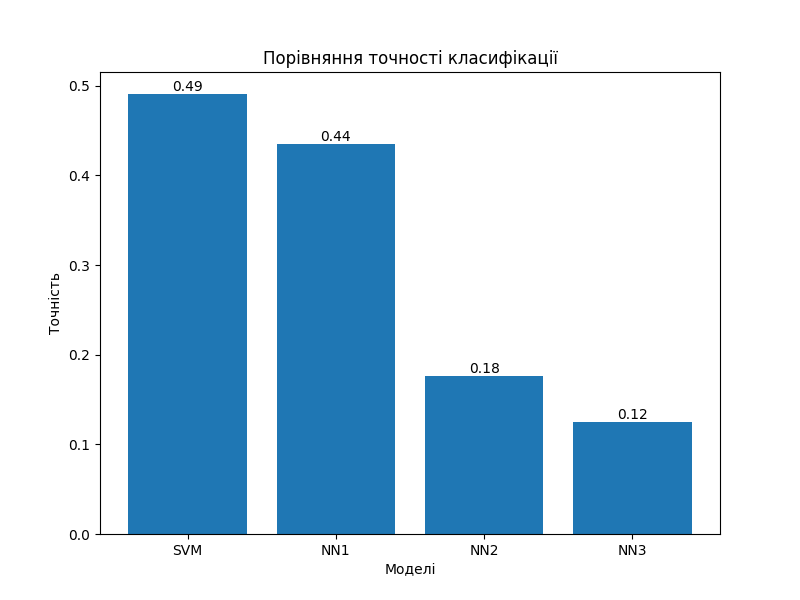

In [31]:
fig = plt.figure(figsize=(8, 6))

In [32]:
# Точність SVM
svm_acc = clf.score(X_test_scaled, y_test)

# Точності трьох нейронних мереж
nn_accs = [test_acc1, test_acc2, test_acc3]

# Мітки для вісі x
labels = ['SVM', 'NN1', 'NN2', 'NN3']

In [33]:
# Додаємо до графіку стовпчики з точностями
plt.bar(labels, [svm_acc] + nn_accs)

<BarContainer object of 4 artists>

In [36]:
plt.annotate(f'{svm_acc:.2f}', xy=(0, svm_acc), ha='center', va='bottom')
for i, acc in enumerate(nn_accs):
    plt.annotate(f'{acc:.2f}', xy=(i+1, acc), ha='center', va='bottom')


In [34]:
# Додаємо заголовок та підписи вісей
plt.title('Порівняння точності класифікації')
plt.xlabel('Моделі')
plt.ylabel('Точність')


Text(62.722222222222214, 0.5, 'Точність')